# Loan Application Status Prediction

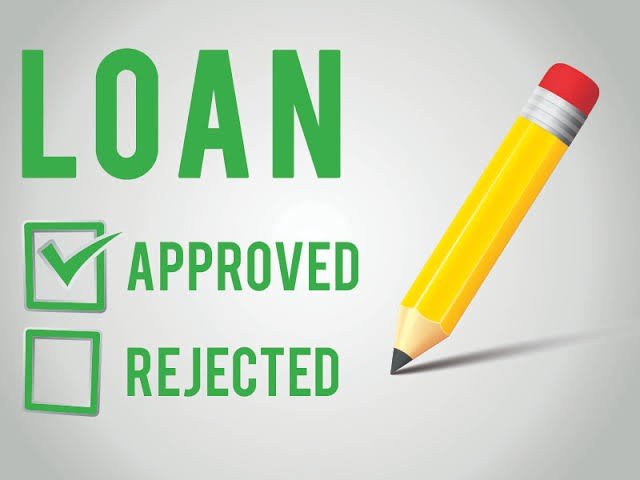

# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

- Loan_ID


- Gender


- Married


- Dependents


- Education


- Self_Employed


- ApplicantIncome


- CoapplicantIncome


- Loan_Amount


- Loan_Amount_Term


- Credit History


- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
251,LP001836,Female,No,2,Graduate,No,3427,0.0,138.0,360.0,1.0,Urban,N
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y


In [7]:
df.shape

(614, 13)

<b>The dataset consists of 614 rows and 13 columns.</b>

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<b>The dataset consists of 13 columns. Here, the column 'Loan_Status' is the target variable and the remaining columns are the features.</b>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# Let's check the null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<b>As we can see the columns 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' have missing values.</b>

# Imputing the missing values

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [12]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [13]:
# Let's check the missing values again

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<b>As we can see, there are no null values in the dataset.</b>

<AxesSubplot:>

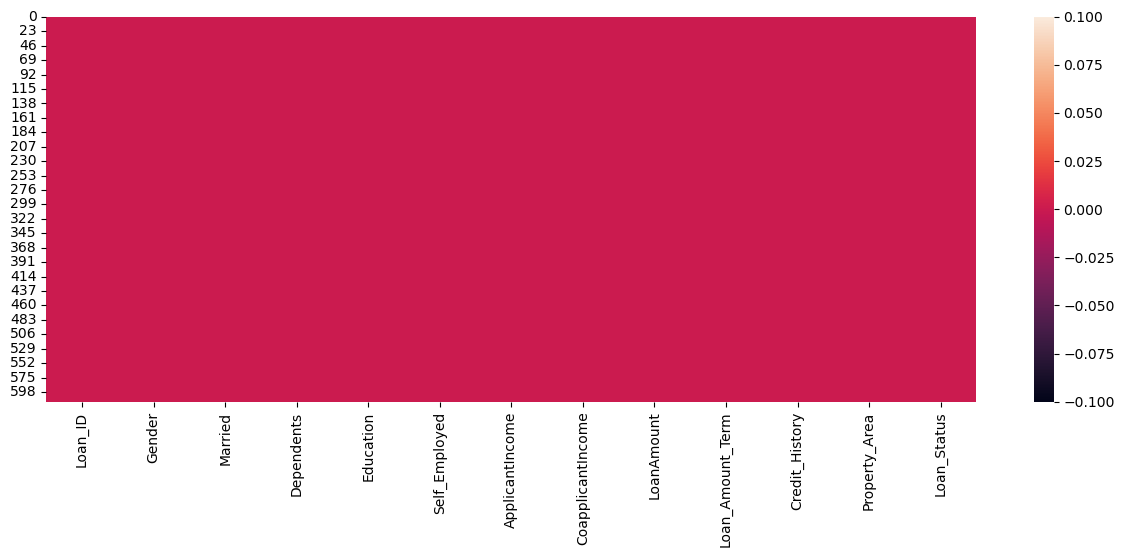

In [14]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b>We can confirm that there are no null values in the dataset by looking at the Heat Map.</b>

In [15]:
# Let's check the number of unique values present in the dataset

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [16]:
# Let's drop the column 'Loan_ID' as it contains only unique values, and serves no purpose in our analysis

df.drop('Loan_ID', axis=1, inplace=True)

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<b>Now, we are left with 614 rows and 12 columns.</b>

In [18]:
# Let's check the value counts of each column

for i in df.columns:
    print('\n','__________________________________')
    print(df[i].value_counts())


 __________________________________
Male      502
Female    112
Name: Gender, dtype: int64

 __________________________________
Yes    401
No     213
Name: Married, dtype: int64

 __________________________________
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 __________________________________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 __________________________________
No     532
Yes     82
Name: Self_Employed, dtype: int64

 __________________________________
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

 __________________________________
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

 __________________________________
146.412162    22
120.000000    20
110.

In [19]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<b>As we can see, some columns are of object datatype. So, we need to carry out encoding techniques.</b>

# Statistical Description of the Dataset

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<b>This provides the statistical description of the data set. As there are no negative / invalid values present in the dataset, we can say that the dataset appears perfect.</b>

<b>By looking at the description of the data, we can conclude the following things:</b>

* Target Variable is imbalanced with 422 yes and 192 No value count.
* Applicant income ranges between 150 and 81000.
* Loan amount is between 9 and 700.
* Applicants with credit history of 1 are more eligible for loan.

<AxesSubplot:>

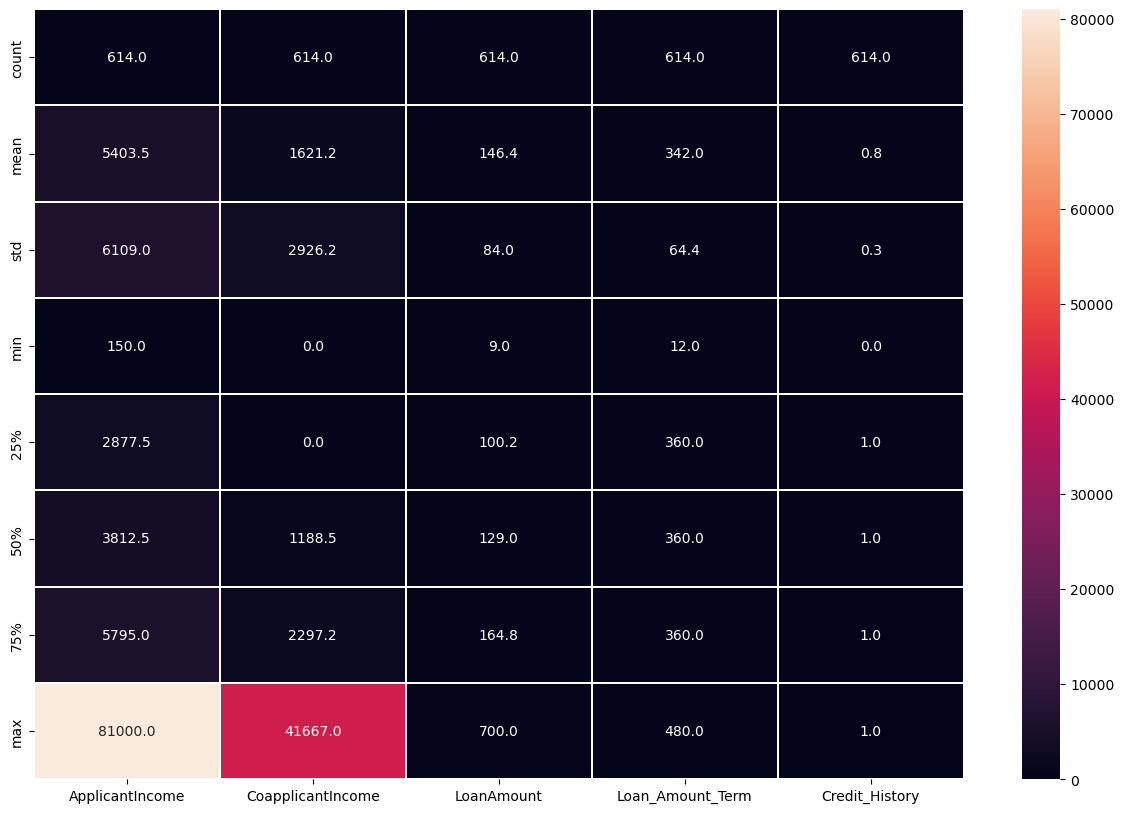

In [21]:
# Now, let's visualize the statistics of the columns using Heatmap

plt.figure(figsize=(15,10))

sns.heatmap(df.describe(), linewidths=0.1, fmt='0.1f', annot=True)

In [22]:
# Now, let's separate the categorical columns

categorical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [23]:
# Now, let's separate the numerical columns

numerical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Data Visualization

# Univariate Analysis

<b>Now, let's visualize the categorical columns</b>

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

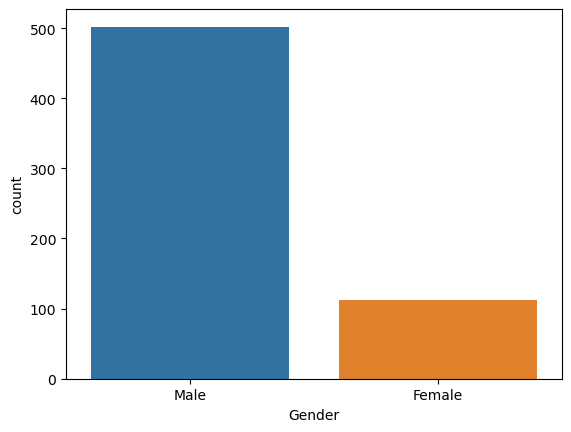

In [24]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

<b>As we can see, majority of loan applicants are Male.</b>

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

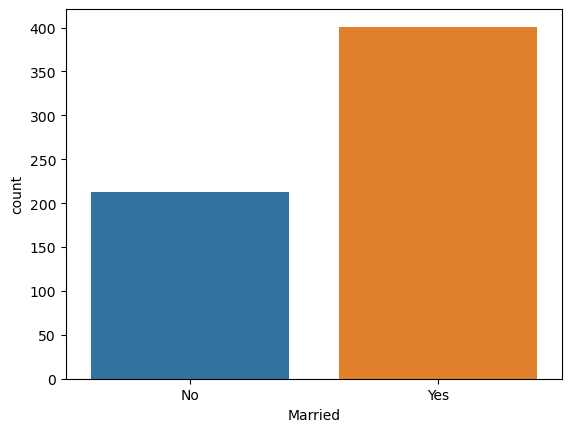

In [25]:
print(df['Married'].value_counts())
sns.countplot(df['Married'])

<b>As we can see, majority of loan applicants are married.</b>

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

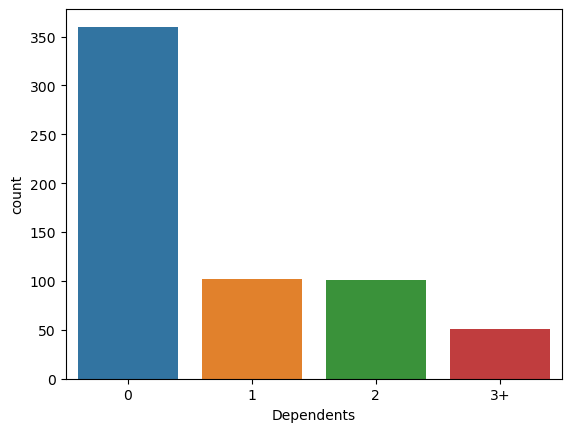

In [26]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])

<b>As we can see, majority of loan applicants have no dependents.</b>

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

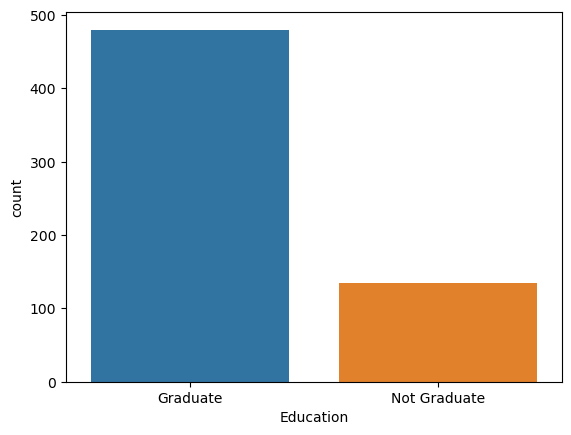

In [27]:
print(df['Education'].value_counts())
sns.countplot(df['Education'])

<b>As we can see, majority of loan applicants are Graduates.</b>

No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

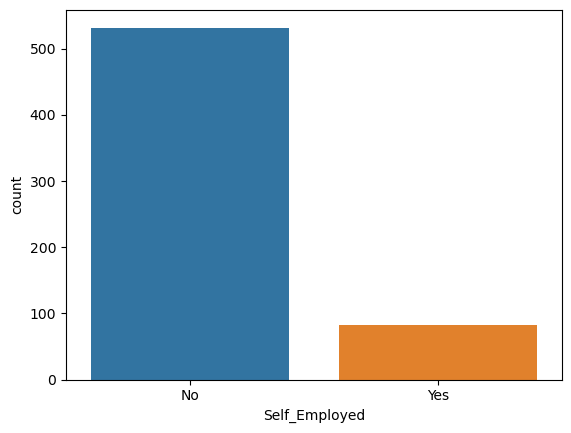

In [28]:
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])

<b>As we can see, majority of loan applicants are not self-employed.</b>

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

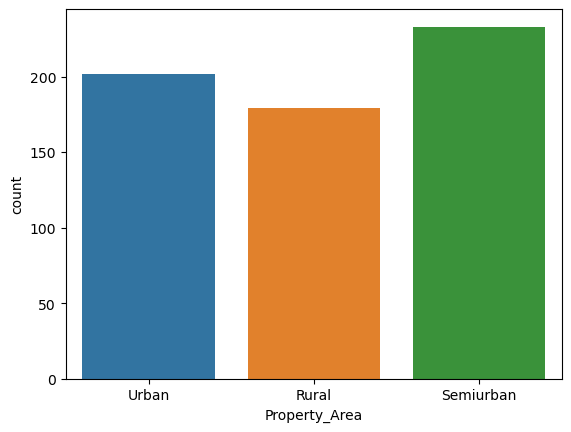

In [29]:
print(df['Property_Area'].value_counts())
sns.countplot(df['Property_Area'])

<b>As we can see, majority of loan applicants have Property in the Semiurban area, followed by Urban and Rural area.</b>

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

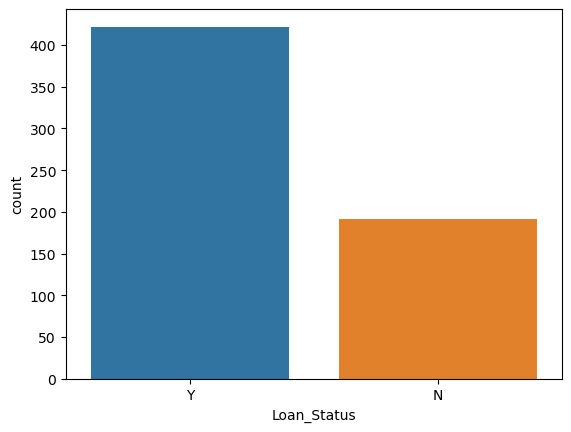

In [30]:
print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'])

<b>As we can see, majority of loan applicants got their loan approved.</b>

# Checking the distribution of data for numerical columns

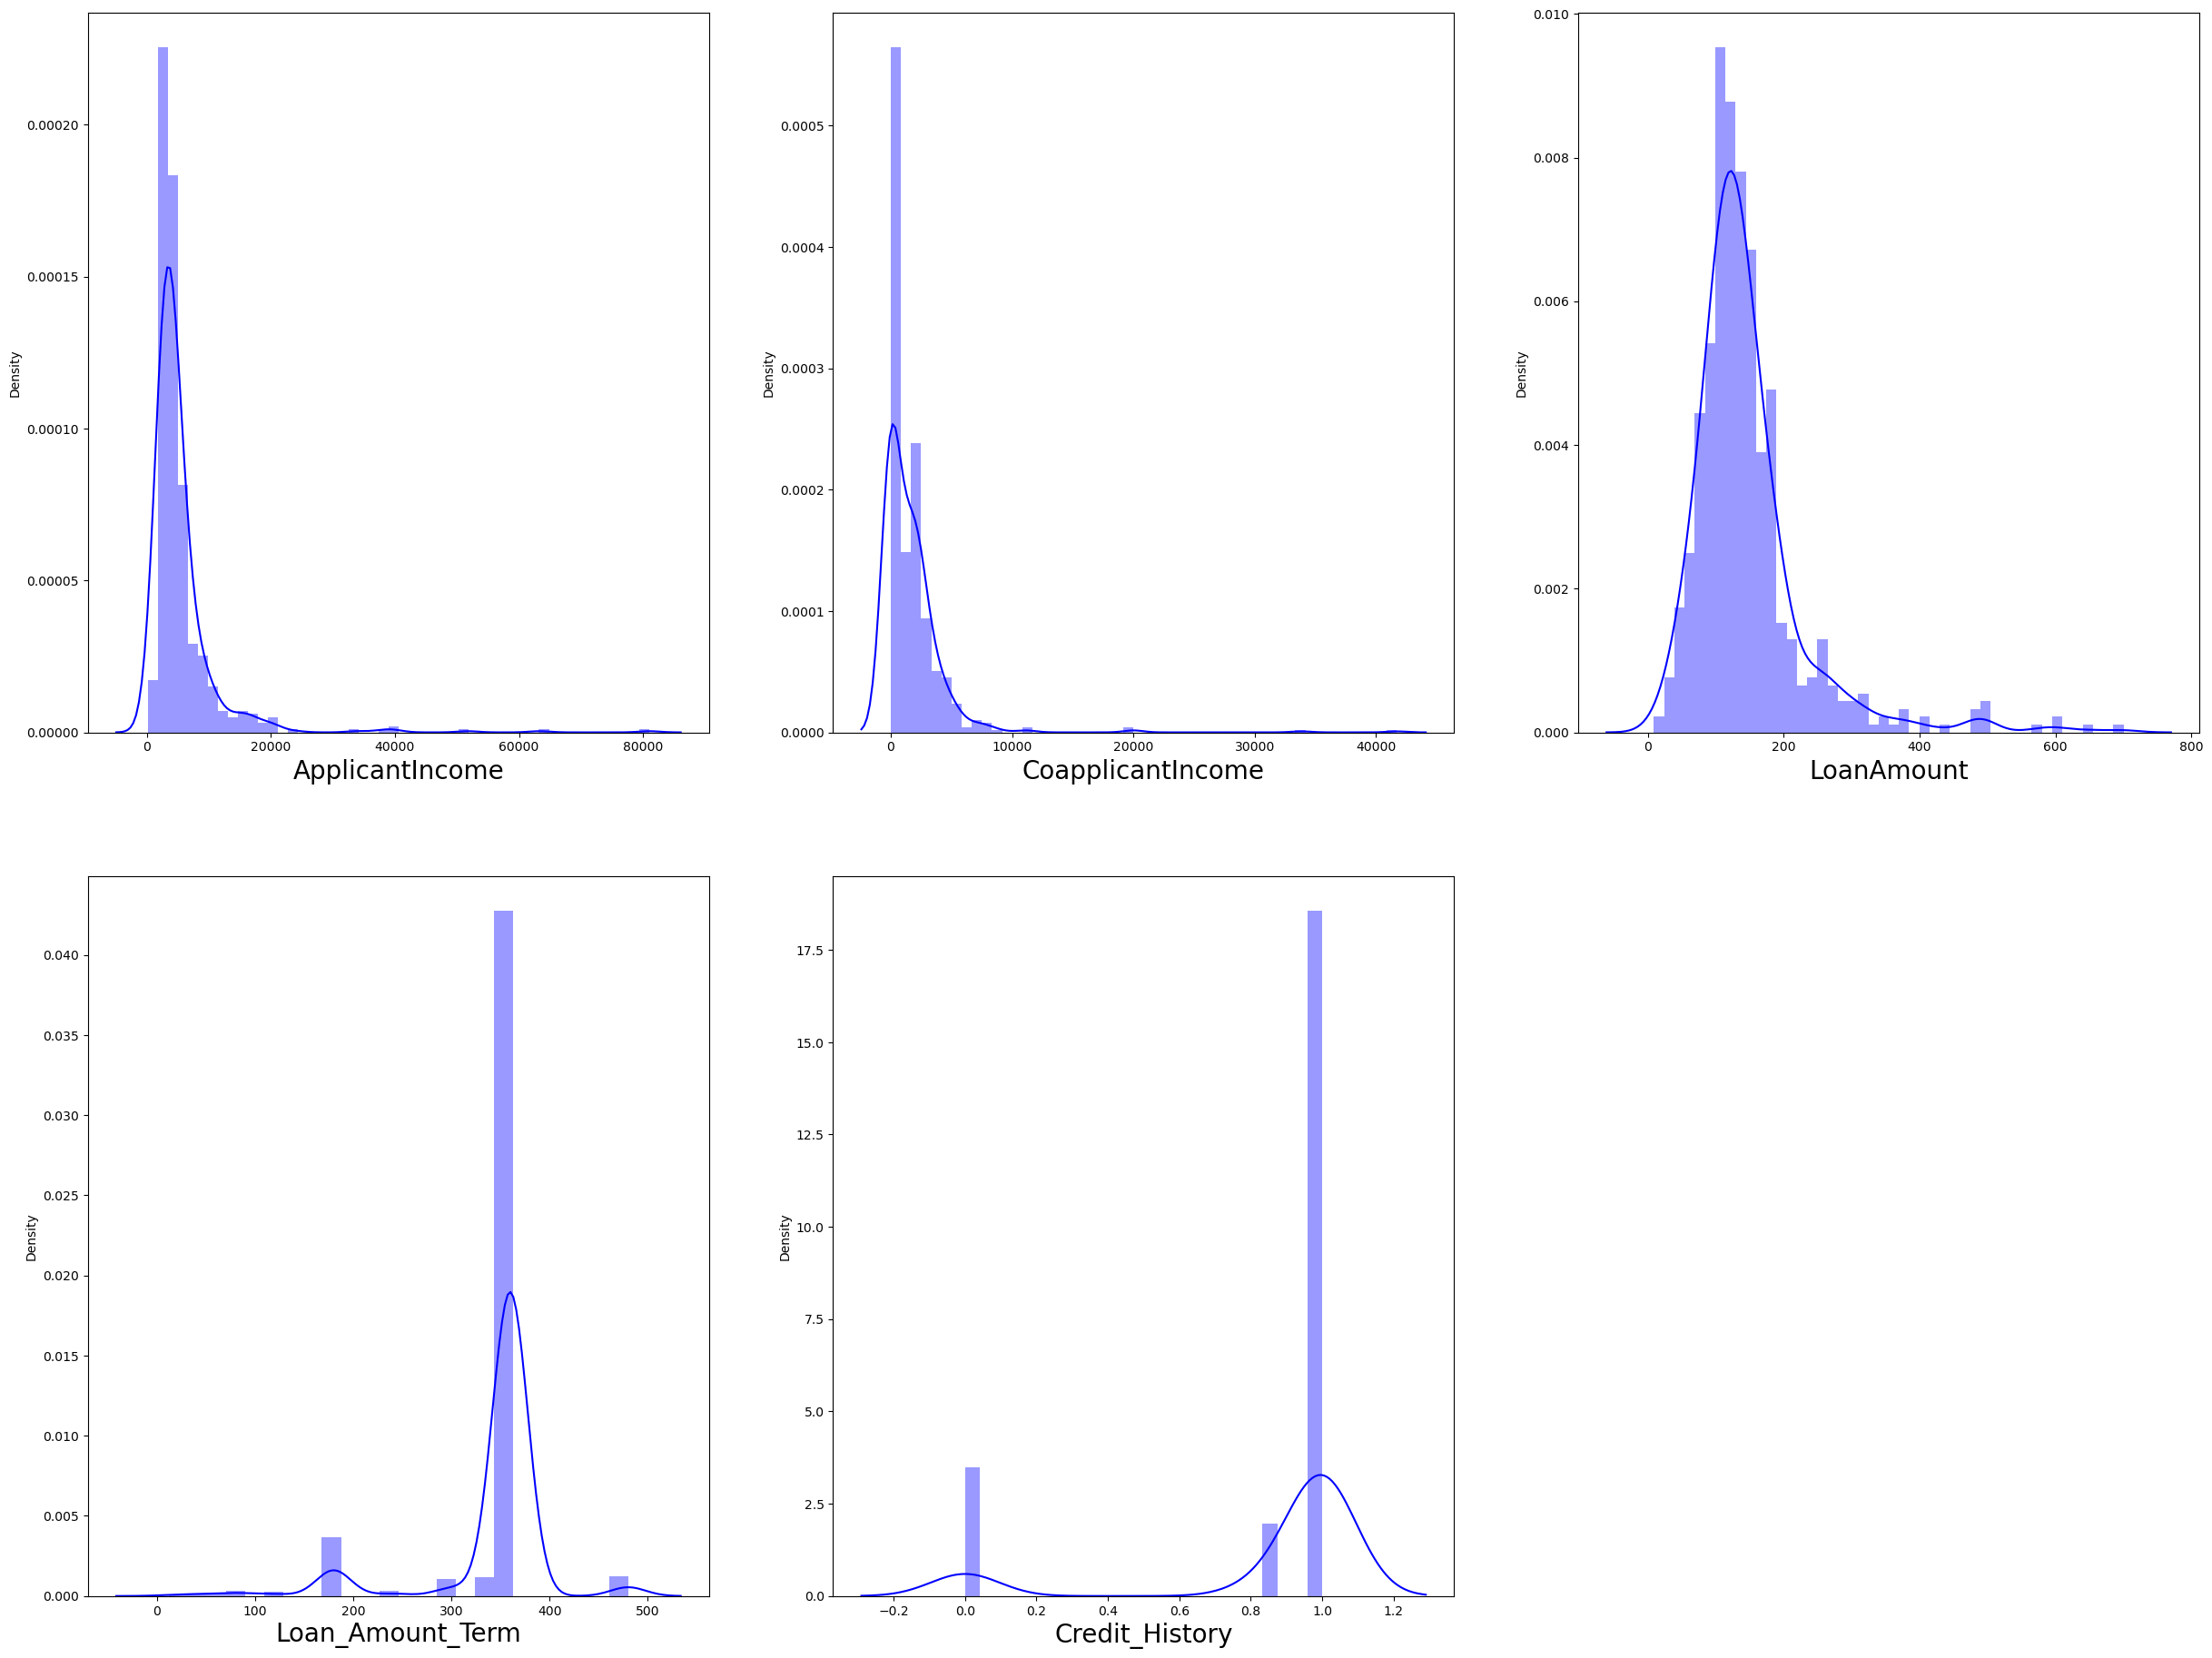

In [31]:
plt.figure(figsize=(30,35))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color='blue')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()


<b>From the distribution plot above, we can observe the following things:</b>

* The columns 'ApplicantIncome', 'CoapplicatIncome' and 'LoanAmount' are right-skewed.
* The column 'LoanAmount_Term' is left-skewed.
* The column 'Credit_History' is scattered.

# Bivariate Analysis

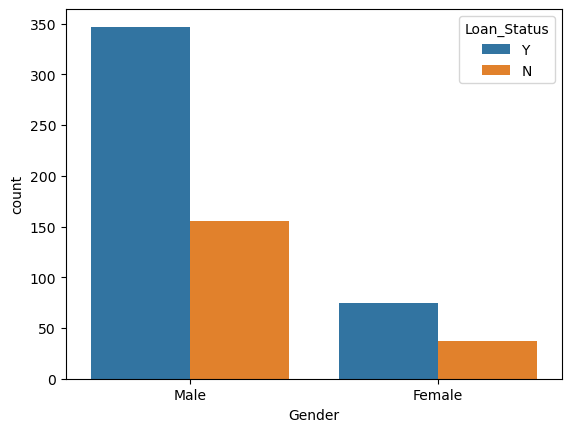

In [32]:
sns.countplot(df['Gender'], hue=df['Loan_Status'])
plt.show()

<b>As we can, Males are more likely to get their loan approved.</b>

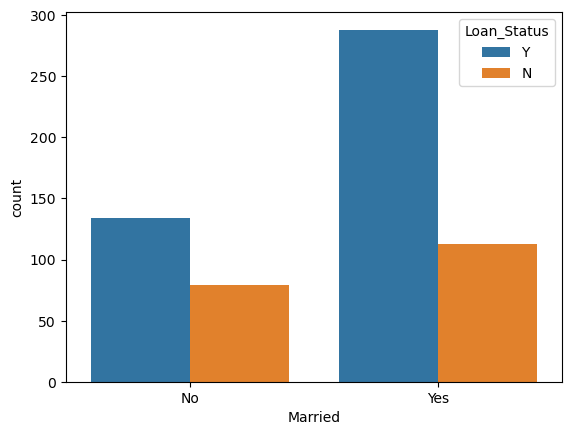

In [33]:
sns.countplot(df['Married'], hue=df['Loan_Status'])
plt.show()

<b>As we can, married people are more likely to get their loan approved.</b>

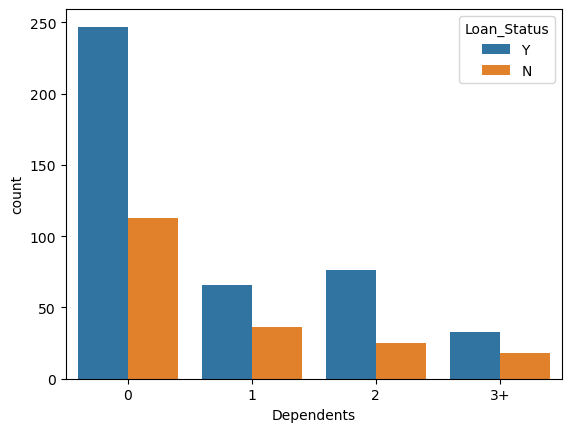

In [34]:
sns.countplot(df['Dependents'], hue=df['Loan_Status'])
plt.show()

<b>As we can, people with no dependents are more likely to get their loan approved.</b>

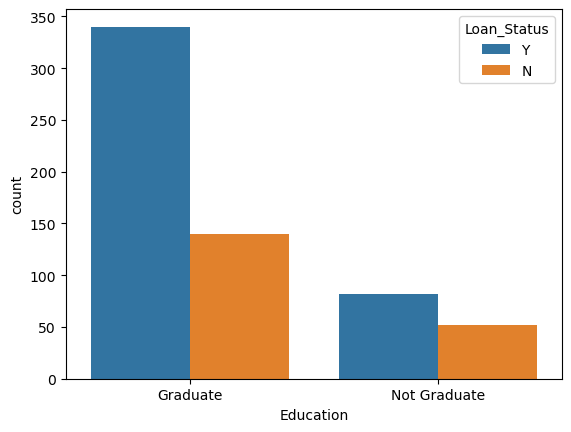

In [35]:
sns.countplot(df['Education'], hue=df['Loan_Status'])
plt.show()

<b>As we can, graduates are more likely to get their loan approved.</b>

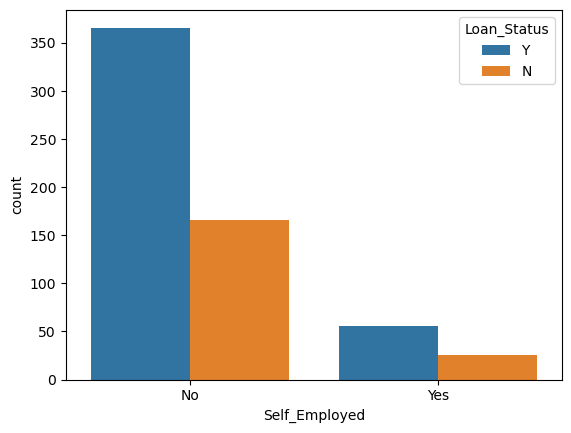

In [36]:
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'])
plt.show()

<b>As we can, people who are not self-employed are more likely to get their loan approved.</b>

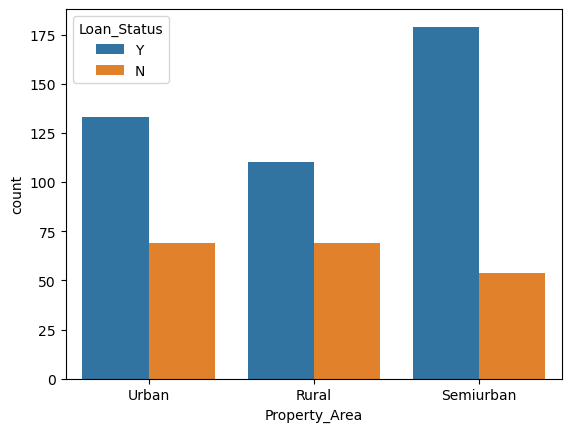

In [37]:
sns.countplot(df['Property_Area'], hue=df['Loan_Status'])
plt.show()

<b>As we can, people who have property in the Semiurban Area are more likely to get their loan approved.</b>

# Multivariate Analysis

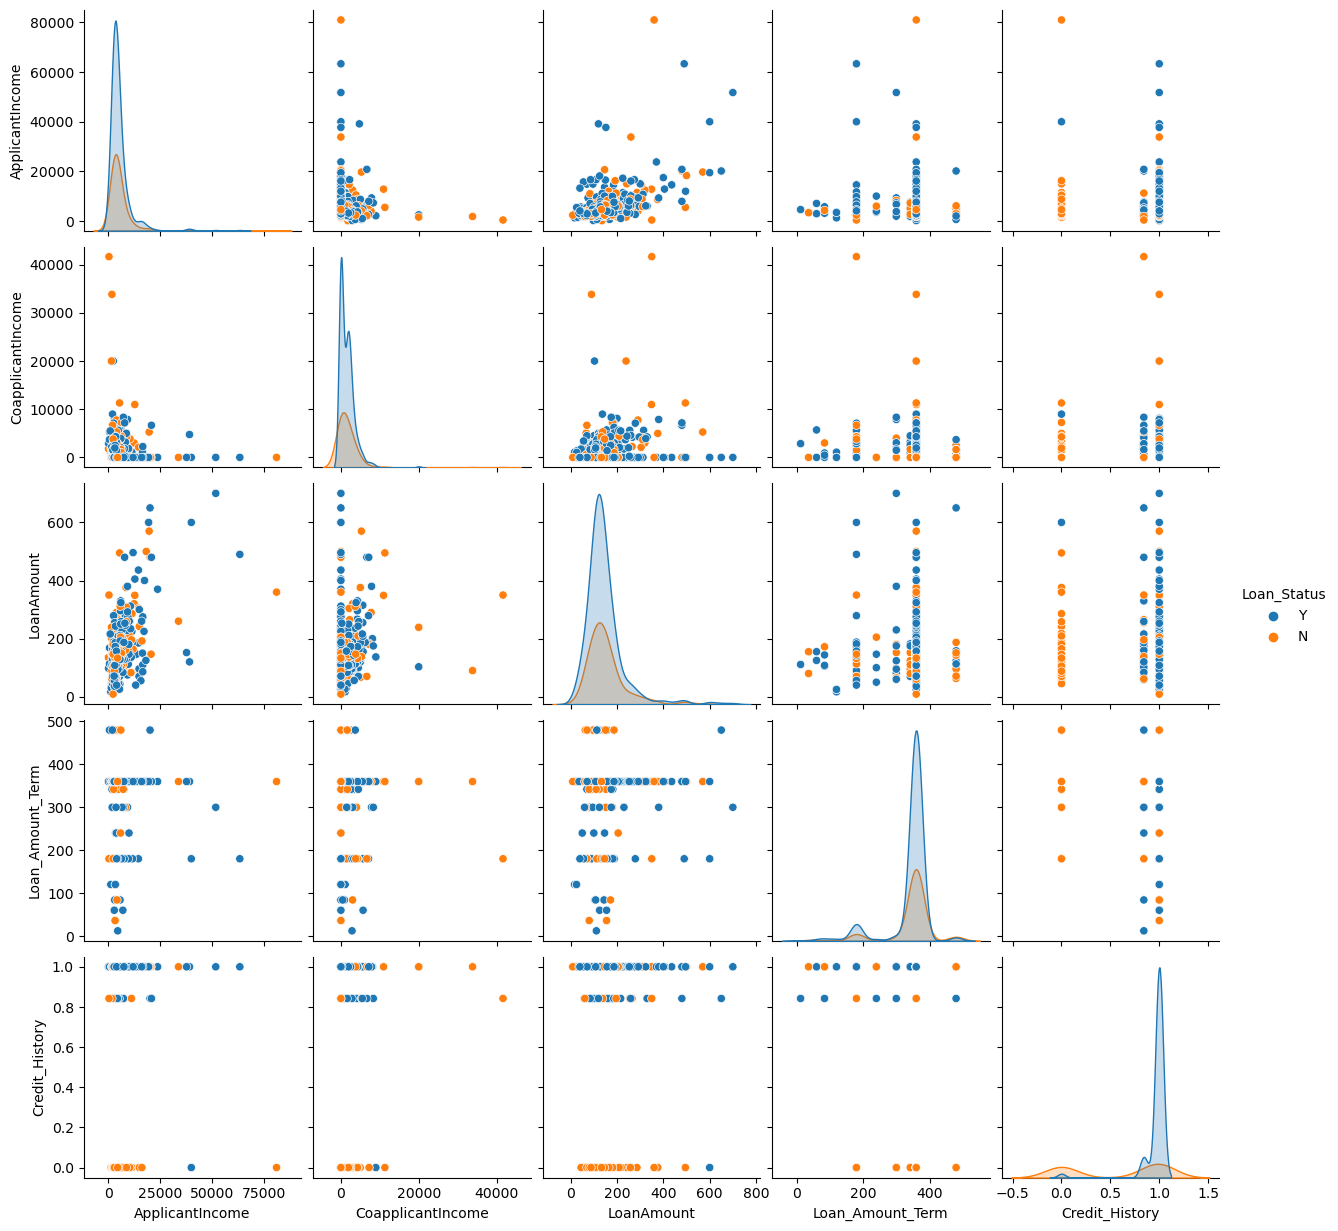

In [38]:
sns.pairplot(df, hue='Loan_Status')

# Outliers Detection

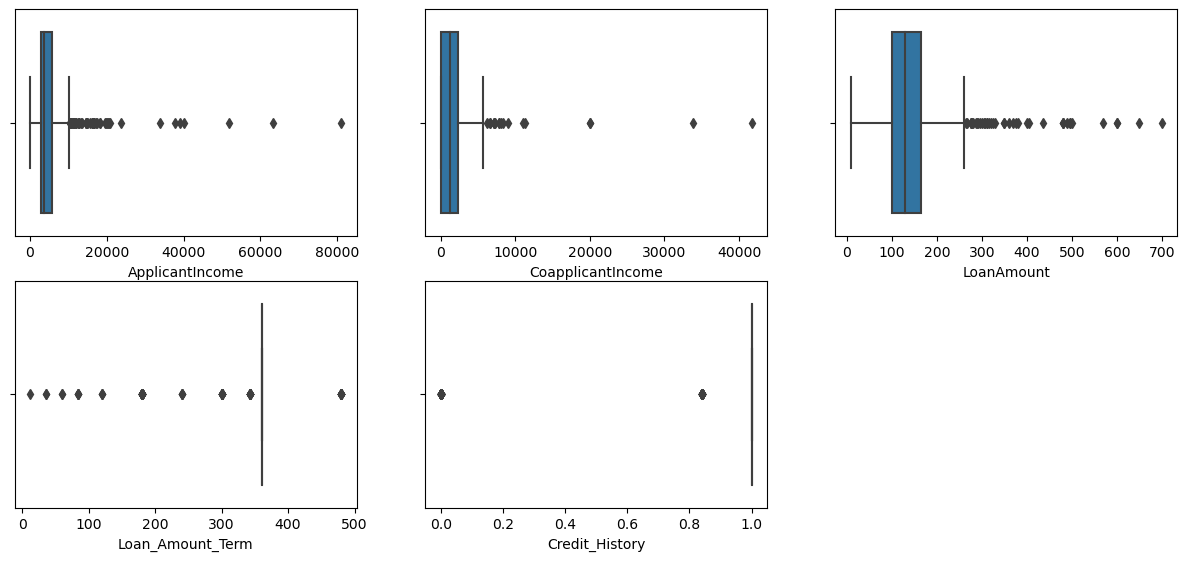

In [39]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.show()

<b>As we can see, outliers are present in all the columns.</b>

In [40]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

from scipy.stats import zscore

z = np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [41]:
# Now, let's create a new dataframe

df_new = df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [42]:
print(df.shape) 
print(df_new.shape) 

(614, 12)
(577, 12)


# Percentage data loss

In [43]:
loss_percent = (614-577)/614*100
print(loss_percent, '%')

6.026058631921824 %


<b>As the data loss is just 6.02%, we can proceed further.</b>

In [44]:
df_new.shape

(577, 12)

# Checking for Skewness

In [45]:
df_new.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.921860
LoanAmount           1.113132
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
dtype: float64

<b>All the columns do not lie in the range of +/-0.5. Thus, skewness is present in these columns.</b>

# Removing Skewness using yeo-johnson method

In [46]:
skewed_features = ['LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']

In [47]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [48]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)

df_new[skewed_features].head()

,LoanAmount,CoapplicantIncome,ApplicantIncome
0,0.316078,-1.122446,0.681780
1,-0.015871,0.744117,0.234783
2,-1.443112,-1.122446,-0.527201
3,-0.169860,0.895786,-0.791972
4,0.221481,-1.122446,0.728848


In [49]:
# Now, let's check the skewness again after applying yeo-johnson method

df_new.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.921860
CoapplicantIncome   -0.191876
ApplicantIncome      0.027981
LoanAmount           0.047692
dtype: float64

<b>We can see that the skewness has been removed.</b>

<b>Now, let's visualize the data using distplot.</b>

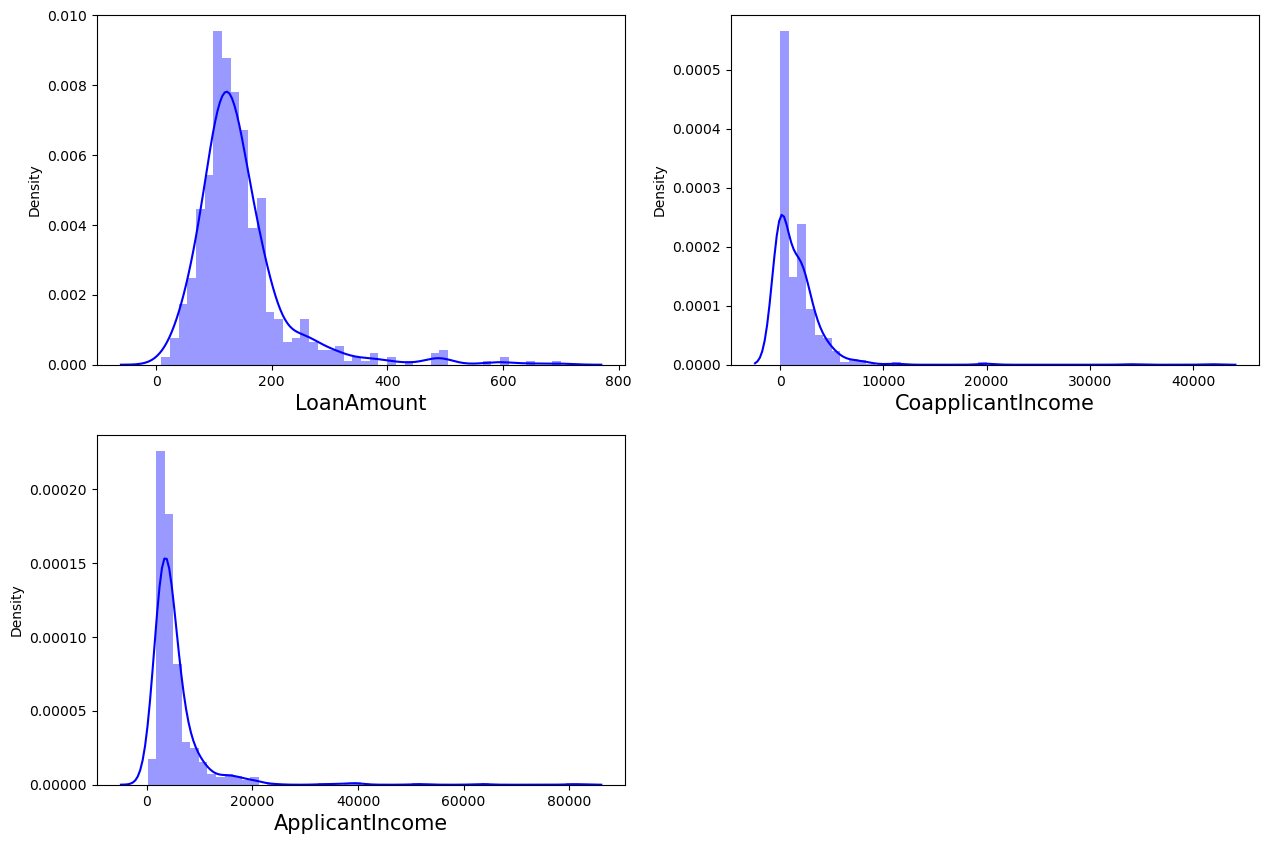

In [50]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in df_new[skewed_features]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column], color='blue')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()


<b>As we can see, the skewness has been removed and the data appears to be normal.</b>

# Encoding the categorical columns using Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df_new[categorical_columns] = df_new[categorical_columns].apply(LE.fit_transform)
df_new[categorical_columns]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


# Correlation between features and labels

In [52]:
df_new.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.104412,0.016566,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.127289,0.013364,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131807,-0.083756,-0.017044,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.094628,-0.080920,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.033346,-0.014899,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.068592,0.034734,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.196334,-0.000588,0.001596,-0.074476,0.079344
LoanAmount,0.173082,0.182006,0.131807,-0.126509,0.117550,0.434072,0.196334,1.000000,0.048864,-0.006850,-0.094220,-0.028999
Loan_Amount_Term,-0.104412,-0.127289,-0.083756,-0.094628,-0.033346,-0.068592,-0.000588,0.048864,1.000000,0.030430,-0.058990,-0.018144
Credit_History,0.016566,0.013364,-0.017044,-0.080920,-0.014899,0.034734,0.001596,-0.006850,0.030430,1.000000,-0.009747,0.561857


# Correlation between features and labels using Heatmap

<AxesSubplot:>

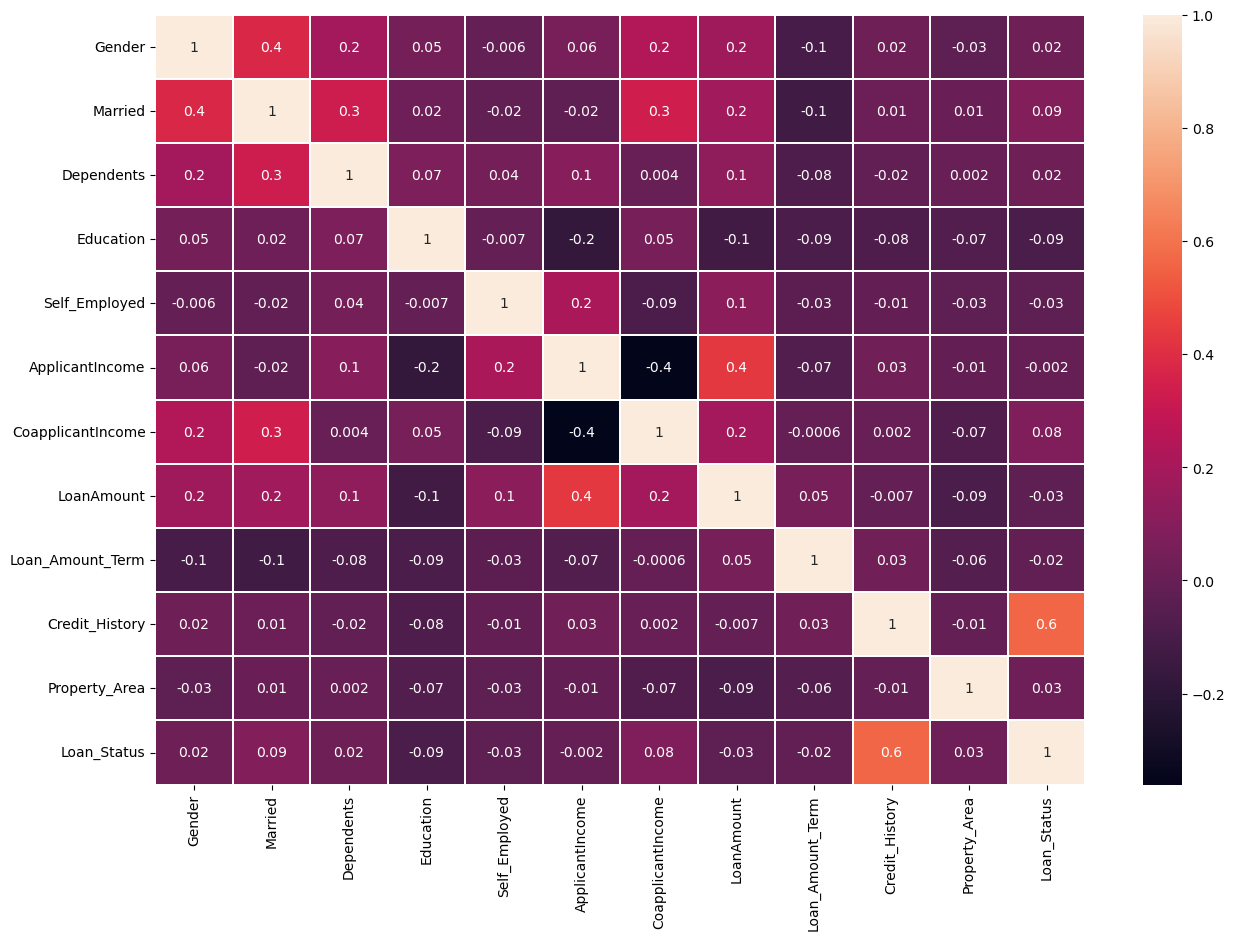

In [53]:
plt.figure(figsize=(15,10))

sns.heatmap(df_new.corr(), linewidths=0.1, fmt='.1g', annot = True)

<b>The heatmap contains both positive and negative correlations.</b>

<b>By looking at the heatmap, we can conclude the following things:
* The target column 'Loan_Status' is highly positively correlated with the column 'Credit_History'. 
* The other features have very less correlation with the target column 'Loan_Status'. 
* We can notice there is no multicollinearity issue in the features. 
* Features have moderate level of correlation with each other. 
* The columns 'ApplicantIncome' and 'Gender' are very less correlated with the target.

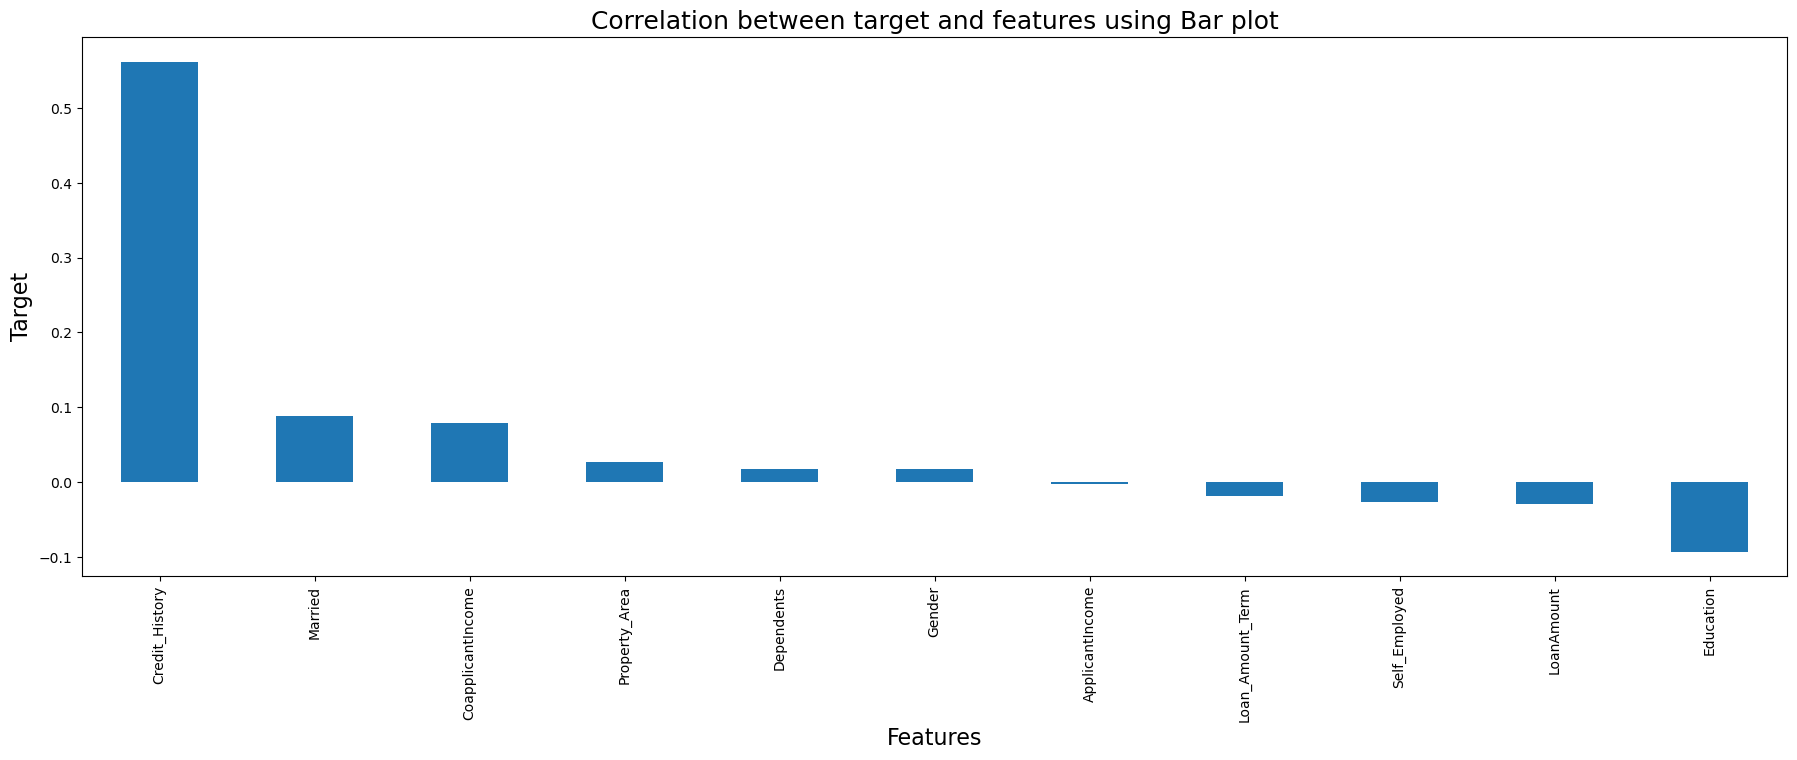

In [54]:
plt.figure(figsize=(22,7))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

<b>None of the columns have very good correlation with our target column except Credit_History.</b>

# Seperating dependent and independent variables

In [55]:
x = df_new.drop('Loan_Status', axis=1)

y = df_new['Loan_Status']

In [56]:
x.shape

(577, 11)

In [57]:
y.shape

(577,)

# Balancing the dataset using SMOTE

In [58]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [60]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

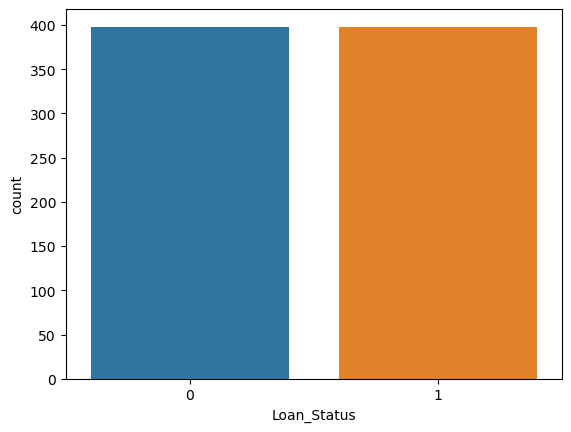

In [61]:
sns.countplot(y)

# Data Standardization using Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.517219,-1.197602,-0.670319,-0.505490,-0.334263,0.693076,-1.045454,0.323803,0.221455,0.591975,1.311288
1,0.517219,0.835002,0.398968,-0.505490,-0.334263,0.229185,0.828203,-0.011608,0.221455,0.591975,-1.191794
2,0.517219,0.835002,-0.670319,-0.505490,2.991655,-0.561598,-1.045454,-1.453733,0.221455,0.591975,1.311288
3,0.517219,0.835002,-0.670319,1.978277,-0.334263,-0.836376,0.980449,-0.167203,0.221455,0.591975,1.311288
4,0.517219,-1.197602,-0.670319,-0.505490,-0.334263,0.741922,-1.045454,0.228219,0.221455,0.591975,1.311288
...,...,...,...,...,...,...,...,...,...,...,...
791,0.517219,0.835002,-0.670319,-0.505490,-0.334263,-0.054339,1.060303,0.980832,0.221455,0.382531,1.311288
792,0.517219,-1.197602,-0.670319,-0.505490,-0.334263,2.169769,-1.045454,1.735181,0.221455,-0.971536,0.059747
793,0.517219,0.835002,-0.670319,-0.505490,-0.334263,0.708488,0.960270,1.722423,0.221455,0.285631,-1.191794
794,-1.933415,0.835002,-0.670319,-0.505490,-0.334263,0.243003,-1.045454,-0.282860,0.221455,0.591975,-1.191794


<b>The data has been scaled now.</b>

# Checking VIF values to solve multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.238184,Gender
1,1.475195,Married
2,1.211996,Dependents
3,1.093949,Education
4,1.045472,Self_Employed
5,1.858279,ApplicantIncome
6,1.695886,CoapplicantIncome
7,1.683414,LoanAmount
8,1.089302,Loan_Amount_Term
9,1.015391,Credit_History


<b>As none of the columns have vif greater than 10, there is no multicollinearity probem.</b>

# Finding best random state

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [65]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state =i)
    LR = LogisticRegression()
    LR.fit(xtrain, ytrain)
    pred = LR.predict(xtest)
    acc=accuracy_score(ytest, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, " on Random_state ", maxRS)

Best accuracy is  0.8140703517587939  on Random_state  78


# Train Test Split

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=78)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression

In [69]:
LR.fit(xtrain,ytrain)

predlr = LR.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,predlr)}")

Accuracy Score: 81.4070351758794%
roc_auc_score: 80.76688983566648%
---------------------------------------------------
Confusion Matrix : 
 [[66 27]
 [10 96]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        93
           1       0.78      0.91      0.84       106

    accuracy                           0.81       199
   macro avg       0.82      0.81      0.81       199
weighted avg       0.82      0.81      0.81       199



# Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred_dt = dt.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_dt)}")

Accuracy Score: 75.37688442211056%
roc_auc_score: 75.50213024954353%
---------------------------------------------------
Confusion Matrix : 
 [[72 21]
 [28 78]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.72      0.77      0.75        93
           1       0.79      0.74      0.76       106

    accuracy                           0.75       199
   macro avg       0.75      0.76      0.75       199
weighted avg       0.76      0.75      0.75       199



# Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred_rfc = rfc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_rfc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_rfc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_rfc)}")

Accuracy Score: 86.4321608040201%
roc_auc_score: 86.07729762629336%
---------------------------------------------------
Confusion Matrix : 
 [[75 18]
 [ 9 97]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        93
           1       0.84      0.92      0.88       106

    accuracy                           0.86       199
   macro avg       0.87      0.86      0.86       199
weighted avg       0.87      0.86      0.86       199



# KNeighbors Classifier

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pred_knc = knc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_knc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_knc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_knc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_knc)}")

Accuracy Score: 77.38693467336684%
roc_auc_score: 77.2570501115845%
---------------------------------------------------
Confusion Matrix : 
 [[70 23]
 [22 84]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76        93
           1       0.79      0.79      0.79       106

    accuracy                           0.77       199
   macro avg       0.77      0.77      0.77       199
weighted avg       0.77      0.77      0.77       199



# Support Vector Machine Classifier

In [73]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_svc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_svc)}")

Accuracy Score: 77.38693467336684%
roc_auc_score: 76.79549604382228%
---------------------------------------------------
Confusion Matrix : 
 [[63 30]
 [15 91]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        93
           1       0.75      0.86      0.80       106

    accuracy                           0.77       199
   macro avg       0.78      0.77      0.77       199
weighted avg       0.78      0.77      0.77       199



# XGB Classifier Model

In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
pred_xgb = xgb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest,pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_xgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_xgb)}")

Accuracy Score: 84.42211055276381%
roc_auc_score: 84.3223777642524%
--------------------------------------------------------
Confusion Matrix : 
 [[77 16]
 [15 91]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83        93
           1       0.85      0.86      0.85       106

    accuracy                           0.84       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.84      0.84      0.84       199



# Cross-Validation

In [75]:
from sklearn.model_selection import cross_val_score


print("Cross validation score of LogisticRegression() is:", cross_val_score(LR,x,y,cv=5).mean())
print("Cross validation score of DecisionTreeClassifier() is:", cross_val_score(dt,x,y,cv=5).mean())
print("Cross validation score of RandomForestClassifier() is:", cross_val_score(rfc,x,y,cv=5).mean())
print("Cross validation score of KNeighborsClassifier() is:", cross_val_score(knc,x,y,cv=5).mean())
print("Cross validation score of SVC() is:", cross_val_score(svc,x,y,cv=5).mean())
print("Cross validation score of XGBClassifier() is:", cross_val_score(xgb,x,y,cv=5).mean())

Cross validation score of LogisticRegression() is: 0.7337106918238994
Cross validation score of DecisionTreeClassifier() is: 0.7777279874213836
Cross validation score of RandomForestClassifier() is: 0.8279952830188678
Cross validation score of KNeighborsClassifier() is: 0.7688915094339623
Cross validation score of SVC() is: 0.7588757861635219
Cross validation score of XGBClassifier() is: 0.8091194968553459


<b>As we can see, Random Forest Classifier is the best model.</b>

# Plotting ROC-AUC curves

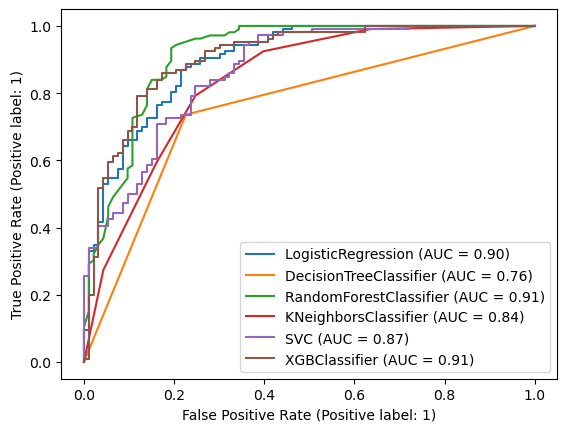

In [76]:
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(LR, xtest, ytest)
plot_roc_curve(dt, xtest, ytest, ax=disp.ax_)     
plot_roc_curve(rfc, xtest, ytest, ax=disp.ax_)
plot_roc_curve(knc, xtest, ytest, ax=disp.ax_)
plot_roc_curve(svc, xtest, ytest, ax=disp.ax_)
plot_roc_curve(xgb, xtest, ytest, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')
plt.show()

# Hyperparameter Tuning

In [77]:
# Now, let's perform Hyperparameter Tuning for Random Forest Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[80, 90, 100, 110],
             'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':[2,4,6],
             'max_features':[2,3],
             'bootstrap':['True']}

GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

GCV.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': ['True'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6], 'max_features': [2, 3],
                         'n_estimators': [80, 90, 100, 110]})

In [78]:
GCV.best_params_

{'bootstrap': 'True',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 3,
 'n_estimators': 110}

In [79]:
#Let's train and test our model using the best parameters

model = RandomForestClassifier(bootstrap= 'True', criterion= 'log_loss', max_depth= 6, max_features= 2, n_estimators= 100)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
print(accuracy_score(ytest,pred)*100)


print(f"Accuracy Score: {accuracy_score(ytest,pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(ytest,pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred)}")
print("---------------------------------------------------")

84.92462311557789
Accuracy Score: 84.92462311557789%
---------------------------------------------------
roc_auc_score: 86.07729762629336%
---------------------------------------------------
Confusion Matrix : 
 [[71 22]
 [ 8 98]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83        93
           1       0.82      0.92      0.87       106

    accuracy                           0.85       199
   macro avg       0.86      0.84      0.85       199
weighted avg       0.86      0.85      0.85       199

---------------------------------------------------


<b>After Hyperparameter Tuning, we got an accuracy score of 84.92%.</b>

# ROC curve for final model

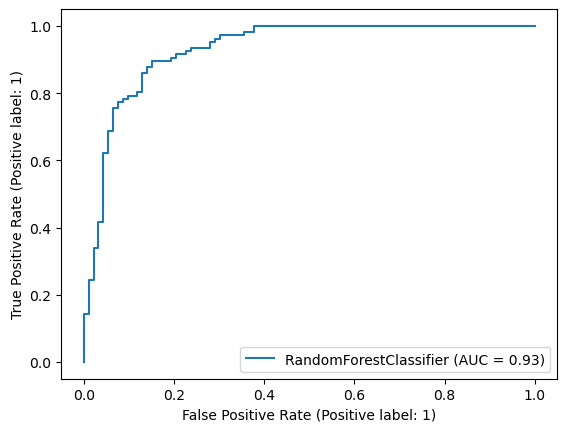

In [81]:
#Lets check our model performance after hyperparameter tuning

plot_roc_curve(model, xtest, ytest)
plt.show()

# Saving the model

In [82]:
import joblib

joblib.dump(model,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']

In [83]:
loadmodel = joblib.load("Loan Application Status Prediction.pkl")

In [84]:
import numpy as np

a = np.array(ytest)
predicted = np.array(loadmodel.predict(xtest))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
194,1,1
195,1,1
196,0,0
197,0,1


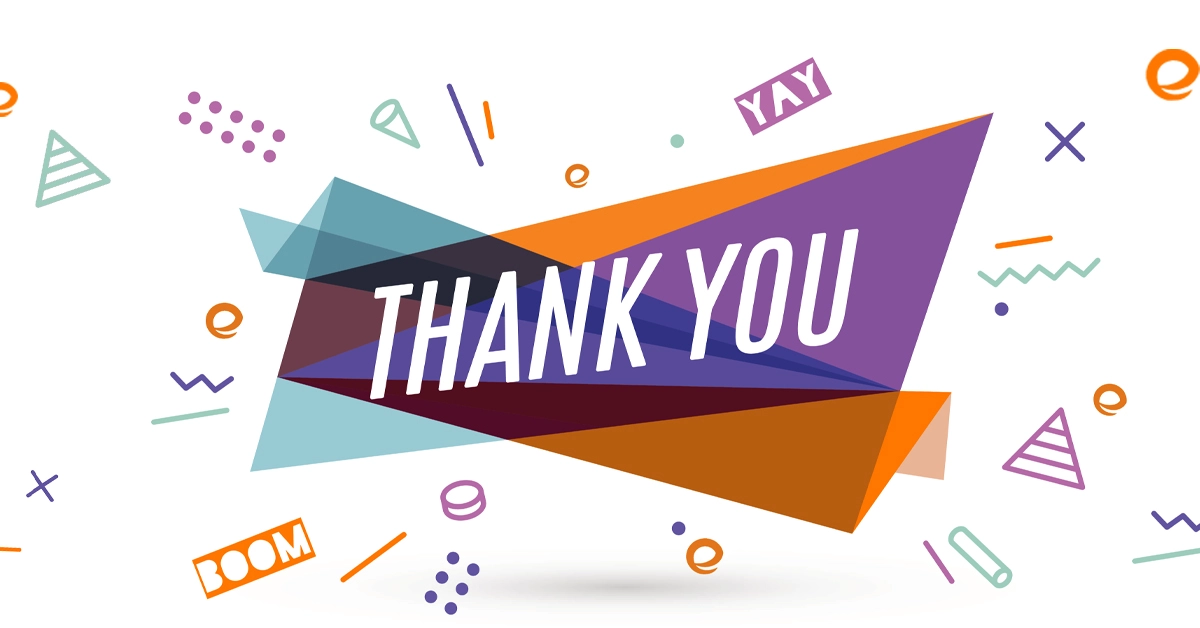